The goal of this notebook is to understand the Singular Value Decomposition algorithm (SVD) a little bit better.
It is based on a very nice discussion by Andrew Gibiansky: http://andrew.gibiansky.com/blog/mathematics/cool-linear-algebra-singular-value-decomposition/.

Instead of going into the details that Andrew goes in, we will concentrate on the two applications of SVD he demonstrates:

- image compression
- regression

# Image compression 

First, let's open the image of the tiger featured in the blog post by Andrew.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
import urllib

In [4]:
from scipy.linalg import svd

In [5]:
from skimage.color import rgb2gray 

In [6]:
url = 'http://andrew.gibiansky.com/blog/mathematics/cool-linear-algebra-singular-value-decomposition/images/tiger.jpg'

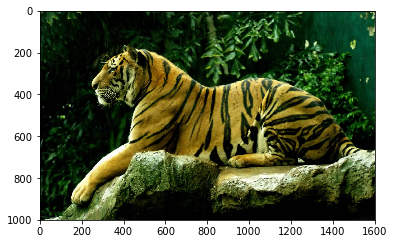

In [7]:
tiger = plt.imread(urllib.request.urlopen(url), format='jpeg')
plt.imshow(tiger, cmap='Greys_r')

Let's check the shape of the tiger.

In [8]:
tiger.shape

(1000, 1600, 3)

As in the blog post, let's convert the tiger to black and white.

In [9]:
tiger = rgb2gray(tiger)

In [10]:
from skimage.color import rgb2gray 

In [11]:
tiger.shape

(1000, 1600)

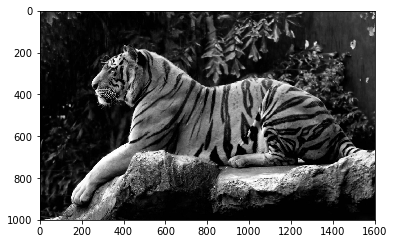

In [12]:
plt.imshow(tiger, cmap='gray')

Now, let's perform the SVD.

In [13]:
U, s, Vh = svd(tiger)

In [14]:
U.shape

(1000, 1000)

In [15]:
Vh.shape

(1600, 1600)

In [16]:
s.shape

(1000,)

Let's look at the magnitude of the eigenvalues.

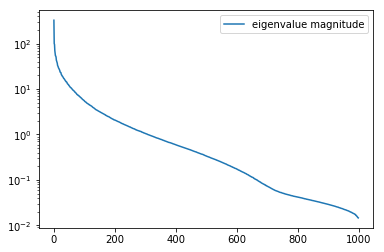

In [17]:
plt.semilogy(s, label='eigenvalue magnitude')
plt.legend()

Let's look at the cumulated sum of the singular values, which can be interpreted as the (unnormed) sum of information contained in these eigenvalues.

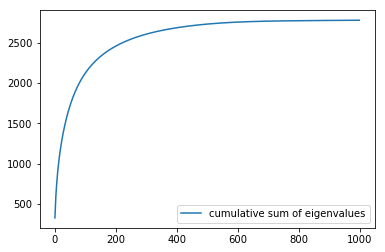

In [18]:
plt.plot(np.cumsum(s), label='cumulative sum of eigenvalues')
plt.legend()

Finally, let's look at approximations of the original image obtained by keeping a certain number of eigenvalues (and setting zeros for the rest). We can use `diagsvd` as a helper for this.

In [19]:
from scipy.linalg import diagsvd

In [20]:
help(diagsvd)

Help on function diagsvd in module scipy.linalg.decomp_svd:

diagsvd(s, M, N)
    Construct the sigma matrix in SVD from singular values and size M, N.
    
    Parameters
    ----------
    s : (M,) or (N,) array_like
        Singular values
    M : int
        Size of the matrix whose singular values are `s`.
    N : int
        Size of the matrix whose singular values are `s`.
    
    Returns
    -------
    S : (M, N) ndarray
        The S-matrix in the singular value decomposition



In [21]:
sigma = diagsvd(s, *tiger.shape)

In [22]:
sigma.shape

(1000, 1600)

In [23]:
reconstructed_tiger = U.dot(sigma.dot(Vh))

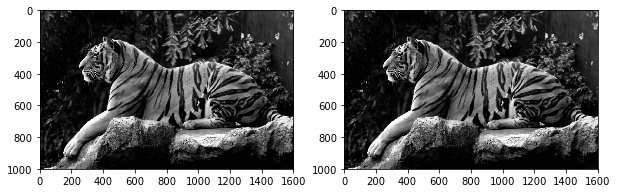

In [24]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.imshow(tiger, cmap='gray')
plt.subplot(122)
plt.imshow(reconstructed_tiger, cmap='gray')

In [25]:
np.allclose(tiger, reconstructed_tiger)

True

Let's now introduce some degree of approximation by reducing the number of singular values in the reconstruction.

In [26]:
from ipywidgets import interact

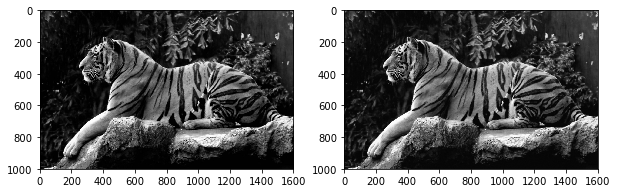

In [27]:
@interact
def approximate_tiger(n=(0, s.size - 1)):
    """Uses n singular values for approximating the tiger image."""
    sigma = diagsvd(s * (np.arange(s.size) < n).astype(np.int), *tiger.shape)
    reconstructed_tiger = U.dot(sigma.dot(Vh))
    plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.imshow(tiger, cmap='gray')
    plt.subplot(122)
    plt.imshow(reconstructed_tiger, cmap='gray')

It's quite interesting to see how much information is contained only in a few singular values.

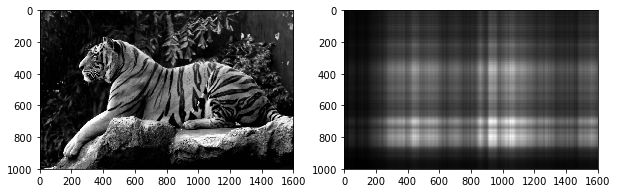

In [28]:
approximate_tiger(1)

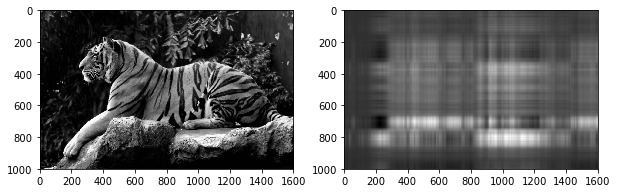

In [29]:
approximate_tiger(2)

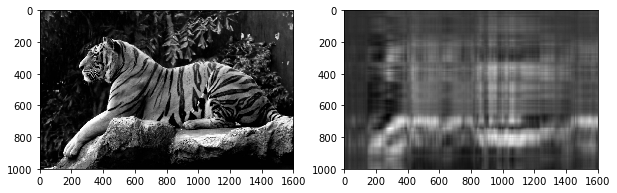

In [30]:
approximate_tiger(4)

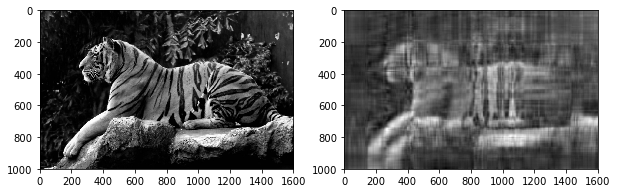

In [31]:
approximate_tiger(10)

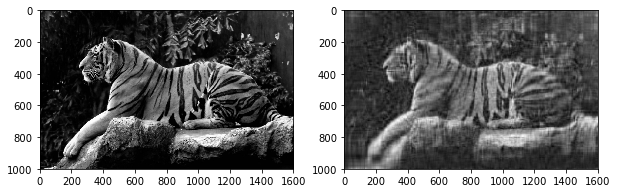

In [32]:
approximate_tiger(25)

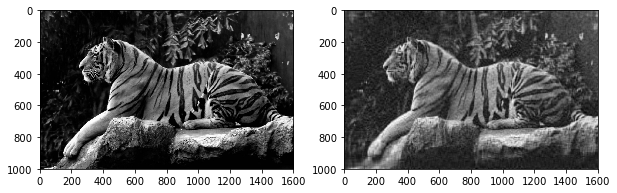

In [33]:
approximate_tiger(50)

# Regression

Let's now move to the second application listed by Andrew, linear regression. Let's generate the test data.

In [34]:
intercept = -10
slope = 3
npts = 50
noise = 80
xs = 10 + np.random.random((npts, 1)) * 90;
ys = slope * xs + intercept + np.random.random((npts, 1)) * noise;

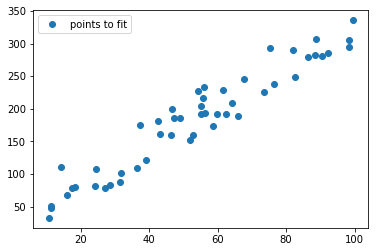

In [35]:
plt.plot(xs, ys, 'o', label='points to fit')
plt.legend()

Let's build the $A$ matrix referred to in the post.

In [36]:
A = np.c_[xs, ys, - np.ones_like(xs)]

In [37]:
A.shape

(50, 3)

Now, let's perform the SVD:

In [38]:
U, s, Vh = svd(A)

In [39]:
s

array([ 1471.92586099,    49.29409757,     2.76407261])

We have three singular values, but only the smallest one contains our linear regression information. We can thus read the coefficients directly from the last value of `Vh`:

In [40]:
Vh.shape

(3, 3)

In [41]:
fit = Vh[:, 1]

In [42]:
fit

array([-0.95945345,  0.28177047,  0.00738112])

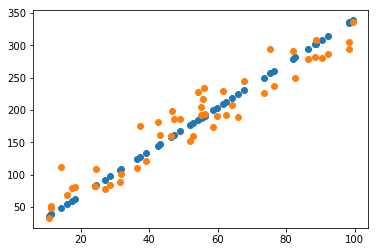

In [43]:
plt.plot(xs, -fit[0] / fit[1] * xs + fit[2] / fit[1], 'o')
plt.plot(xs, ys, 'o')

Interestingly, the right proper value for this linear regression is not the one described in Andrew's article. I wonder there this comes from.